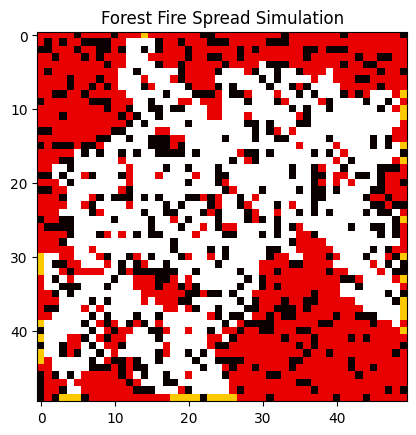

In [ ]:
# Forest Fire Spread Simulation 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Grid settings
size = 50           # Forest grid size
p_tree = 0.8        # Probability of a tree existing
wind_bias = (1, 1)  # Wind direction bias (dy, dx): (0,1)=east wind
steps = 100

# States: 0 = empty, 1 = tree, 2 = burning, 3 = burnt
forest = np.random.choice([0, 1], (size, size), p=[1-p_tree, p_tree])
forest[size//2, size//2] = 2  # Start fire at center

def spread_fire(forest):
    new = forest.copy()
    for i in range(1, size-1):
        for j in range(1, size-1):
            if forest[i,j] == 2:
                new[i,j] = 3
                # Spread fire to neighbors
                for di in [-1,0,1]:
                    for dj in [-1,0,1]:
                        if forest[i+di,j+dj] == 1:
                            prob = 0.3
                            # Add wind effect
                            if (di, dj) == wind_bias:
                                prob += 0.3
                            if np.random.rand() < prob:
                                new[i+di,j+dj] = 2
    return new

frames = []
fig, ax = plt.subplots()
im = ax.imshow(forest, cmap='hot', vmin=0, vmax=3)
ax.set_title("Forest Fire Spread Simulation")

def update(frame):
    global forest
    forest = spread_fire(forest)
    im.set_data(forest)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=steps, interval=200, blit=True)
HTML(ani.to_jshtml())


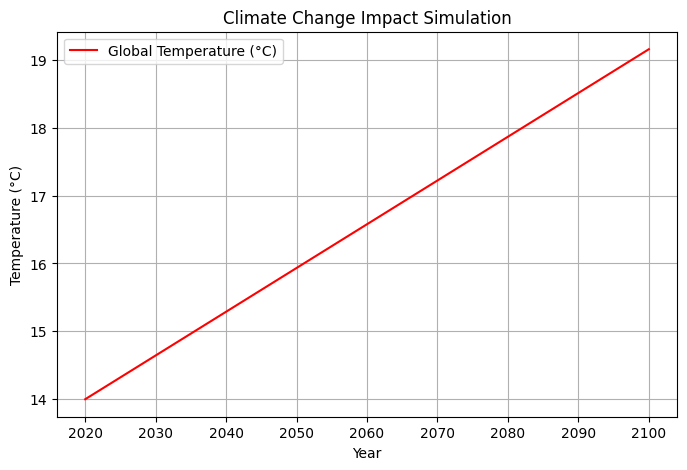

CO2 in 2100: 1349.2 ppm
Temperature rise by 2100: 5.16 °C


In [ ]:
#Climate Change Impact Model 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
years = np.arange(2020, 2101)
base_temp = 14.0             # °C, average global temperature in 2020
CO2_initial = 410            # ppm
CO2_growth_rate = 0.015      # 1.5% yearly increase scenario

# Climate sensitivity (°C per doubling of CO2)
climate_sensitivity = 3.0

# Arrays to store results
CO2 = np.zeros_like(years, dtype=float)
temp = np.zeros_like(years, dtype=float)

CO2[0] = CO2_initial
temp[0] = base_temp

# Model: ΔT = climate_sensitivity * log2(CO2/CO2_initial)
for i in range(1, len(years)):
    CO2[i] = CO2[i-1] * (1 + CO2_growth_rate)
    temp[i] = base_temp + climate_sensitivity * np.log2(CO2[i]/CO2_initial)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(years, temp, label="Global Temperature (°C)", color='red')
plt.title("Climate Change Impact Simulation")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# Display key metrics
print(f"CO2 in 2100: {CO2[-1]:.1f} ppm")
print(f"Temperature rise by 2100: {temp[-1] - base_temp:.2f} °C")


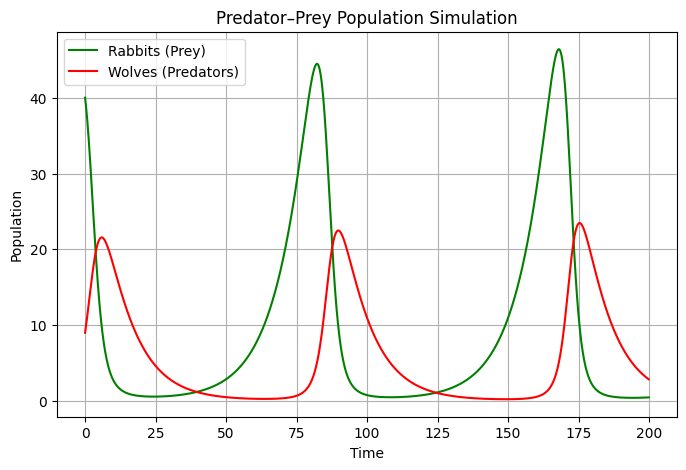

In [ ]:
#Predator–Prey (Lotka–Volterra) Simulation 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1   # Prey birth rate
beta = 0.02   # Predation rate
delta = 0.01  # Predator reproduction rate
gamma = 0.1   # Predator death rate
dt = 0.1
t_max = 200

# Initial populations
rabbits = [40]
wolves = [9]
time = np.arange(0, t_max, dt)

# Simulation loop
for t in time[1:]:
    R = rabbits[-1]
    W = wolves[-1]
    dR = (alpha * R - beta * R * W) * dt
    dW = (delta * R * W - gamma * W) * dt
    rabbits.append(R + dR)
    wolves.append(W + dW)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(time, rabbits, label="Rabbits (Prey)", color='green')
plt.plot(time, wolves, label="Wolves (Predators)", color='red')
plt.title("Predator–Prey Population Simulation")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()


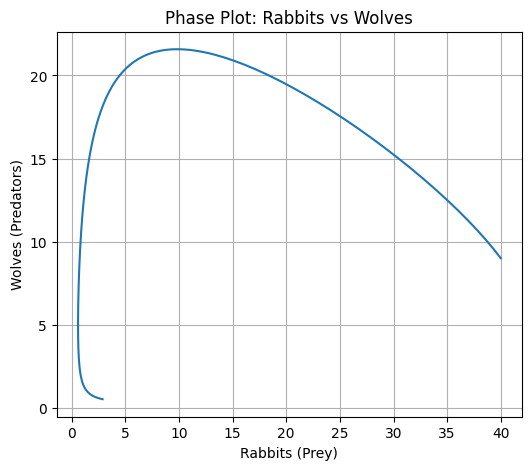

Initial rabbits: 40.0  -> Final rabbits: 2.8784972642446642
Initial wolves : 9.0  -> Final wolves : 0.5159211520610116


In [24]:
plt.figure(figsize=(6, 5))
plt.plot(rabbits, wolves)
plt.title("Phase Plot: Rabbits vs Wolves")
plt.xlabel("Rabbits (Prey)")
plt.ylabel("Wolves (Predators)")
plt.grid(True)
plt.show()

print("Initial rabbits:", R0, " -> Final rabbits:", rabbits[-1])
print("Initial wolves :", W0, " -> Final wolves :", wolves[-1])
